In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pathlib import Path
import os
import collections

%load_ext autoreload
%autoreload 2


ROOT_DIR = Path(os.environ.get('ROOT_DIR'))
DATA_DIR = ROOT_DIR / 'data'

from PIL import Image, ImageDraw, ImageFont
%matplotlib inline

In [6]:
from src.tournament import WorldCup

In [7]:
e = pickle.loads((DATA_DIR / 'models/elo_pickle.pkl').read_bytes())
wc = WorldCup(e)
for game, out in wc.playoffs.items():
    print(f"{game}: {str(out)}")

49: Egypt 0 - 1 Spain
50: Australia 0 - 1 Croatia
51: Portugal 1 - 0 Russia
52: Argentina 0 - 1 France
53: Brazil 1 - 0 Germany
54: Belgium 0 - 1 Japan
55: Mexico 1 - 0 Costa Rica
56: Colombia 0 - 1 England
57: Spain 1 - 0 Croatia
58: Brazil 1 - 0 Japan
59: Portugal 0 - 1 France
60: Mexico 1 - 0 England
61: Spain 1 - 0 Brazil
62: France 1 - 0 Mexico
63: Brazil 0 - 1 Mexico
64: Spain 0 - 1 France


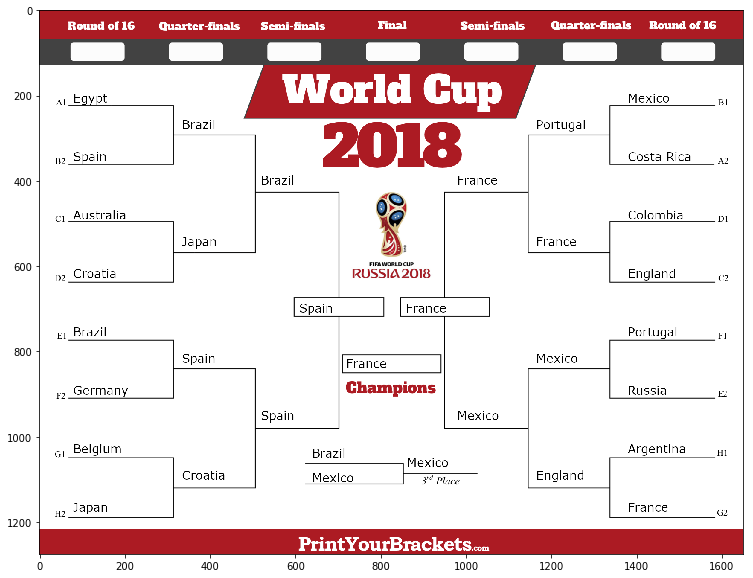

In [11]:
out = wc.plot()
fig, ax = plt.subplots(figsize=(40, 10))
ax.imshow(np.asarray(out),);

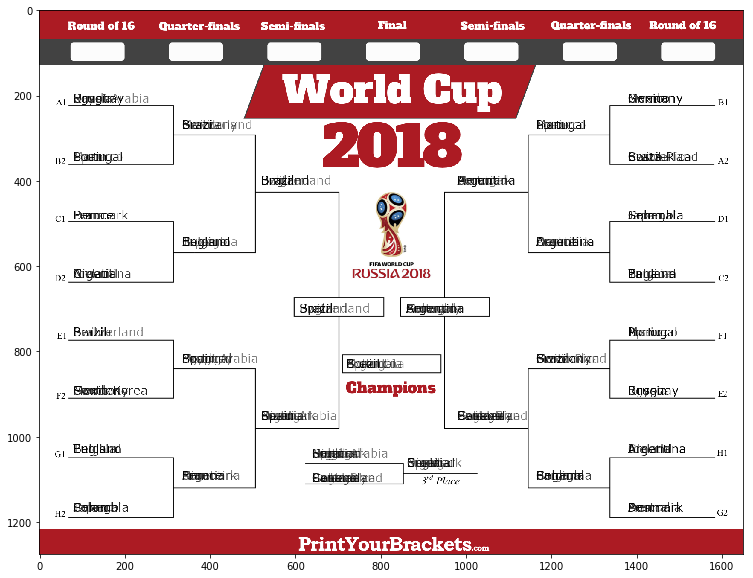

In [13]:
stats = []
image = None
for _ in range(10):
    e = pickle.loads((DATA_DIR / 'models/elo_pickle.pkl').read_bytes())
    wc = WorldCup(e)
    stats.append(wc.stats)
    image = wc.plot(image_file=image, opacity=128)

fig, ax = plt.subplots(figsize=(40, 10))
ax.imshow(np.asarray(image),);